<a href="https://colab.research.google.com/github/RakelOuakil/demo-repo/blob/main/analyseDeDonneeRakel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Chargeons le fichier**

In [2]:
# Charger le fichier Excel
file_path = '/content/DEICING DATA WRO-LOT HANDLING_V2.xlsx'
df = pd.read_excel(file_path)

# **Découvrons les types de données**

In [3]:
# Examiner les colonnes attribuées
colonnes = ["Type", "OneStep Fluid", "TwoStep I Fluid", "TwoStep II Fluid"]

In [4]:
# Afficher les premières lignes des colonnes sélectionnées pour vérifier le chargement correct
print(df[colonnes].head())

      Type OneStep Fluid TwoStep I Fluid TwoStep II Fluid
0  OneStep         75/25             NaN              NaN
1  OneStep         75/25             NaN              NaN
2  OneStep         75/25             NaN              NaN
3  OneStep         75/25             NaN              NaN
4  OneStep         75/25             NaN              NaN


In [5]:
# Vérifier les valeurs uniques et leur fréquence pour la colonne 'Type'
print(df['Type'].value_counts())

Type
OneStep    1791
TwoStep     543
Name: count, dtype: int64


In [6]:
# Exemple pour vérifier les valeurs de 'OneStep Fluid'
print(df['OneStep Fluid'].value_counts())

OneStep Fluid
50/50     998
75/25     771
paŸ.90      1
Name: count, dtype: int64


In [7]:
# Exemple pour vérifier les valeurs de 'TwoStep I Fluid'
print(df['TwoStep I Fluid'].value_counts())

TwoStep I Fluid
20/80        209
paŸ.90       142
30/70        127
50/50         57
40/60         20
75/25          8
0/100 H20      4
60/40          1
Name: count, dtype: int64


In [8]:
# Exemple pour vérifier les valeurs de 'TwoStep II Fluid'
print(df['TwoStep II Fluid'].value_counts())

TwoStep II Fluid
75/25    340
50/50    182
100/0     39
Name: count, dtype: int64


# **Traçons les données**

Répartition des types de dégivrage :
Type
OneStep    1791
TwoStep     543
Name: count, dtype: int64


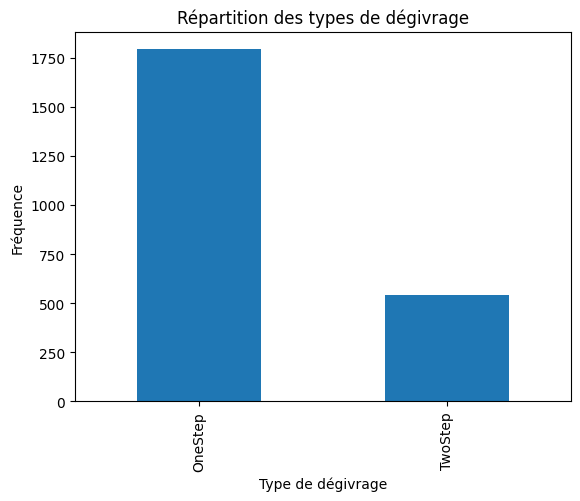

In [9]:
# Analyse univariée - "Type"
type_counts = df["Type"].value_counts()
print("Répartition des types de dégivrage :")
print(type_counts)
type_counts.plot(kind='bar')
plt.title("Répartition des types de dégivrage")
plt.xlabel("Type de dégivrage")
plt.ylabel("Fréquence")
plt.show()

Nous avons 1791 occurrences de "OneStep" et 543 occurrences de "TwoStep". Cela montre la répartition des types de procédures de dégivrage dans nos données

Répartition des fluides pour un dégivrage en OneStep :
OneStep Fluid
50/50     998
75/25     771
paŸ.90      1
Name: count, dtype: int64


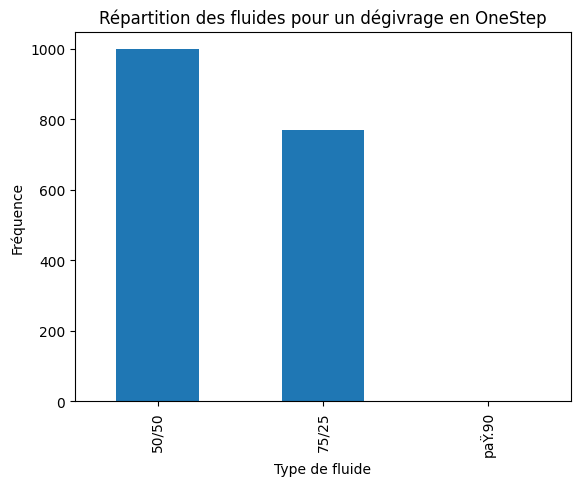

In [10]:
# Analyse univariée - "OneStep Fluid"
one_step_counts = df["OneStep Fluid"].value_counts()
print("Répartition des fluides pour un dégivrage en OneStep :")
print(one_step_counts)
one_step_counts.plot(kind='bar')
plt.title("Répartition des fluides pour un dégivrage en OneStep")
plt.xlabel("Type de fluide")
plt.ylabel("Fréquence")
plt.show()

Nous avons principalement deux proportions dans la colonne 'OneStep Fluid' : "50/50" avec 998 occurrences et "75/25" avec 771 occurrences. Ces valeurs correspondent aux proportions de fluide utilisées pour la procédure de dégivrage/anti-givrage en OneStep.
**Une valeur incohérente : paŸ.90**

Répartition des fluides pour la première étape d'un dégivrage en TwoStep :
TwoStep I Fluid
20/80        209
paŸ.90       142
30/70        127
50/50         57
40/60         20
75/25          8
0/100 H20      4
60/40          1
Name: count, dtype: int64


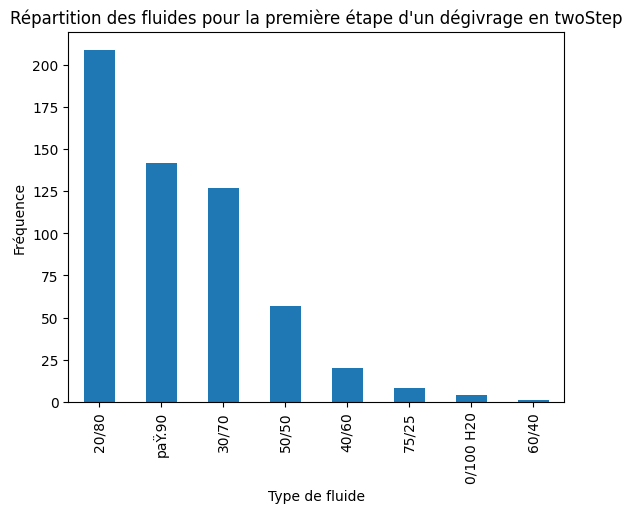

In [11]:
# Analyse univariée - "TwoStep I Fluid"
two_step_i_counts = df["TwoStep I Fluid"].value_counts()
print("Répartition des fluides pour la première étape d'un dégivrage en TwoStep :")
print(two_step_i_counts)
two_step_i_counts.plot(kind='bar')
plt.title("Répartition des fluides pour la première étape d'un dégivrage en twoStep")
plt.xlabel("Type de fluide")
plt.ylabel("Fréquence")
plt.show()

Les proportions pour 'TwoStep I Fluid' montrent une variété de combinaisons : "20/80" avec 209 occurrences, "paŸ.90" avec 142 occurrences (ceci semble être une entrée incorrecte ou mal encodée- peut etre 10/90 ?), "30/70" avec 127 occurrences, etc.

Répartition des fluides pour la deuxième étape d'un dégivrage en TwoStep :
TwoStep II Fluid
75/25    340
50/50    182
100/0     39
Name: count, dtype: int64


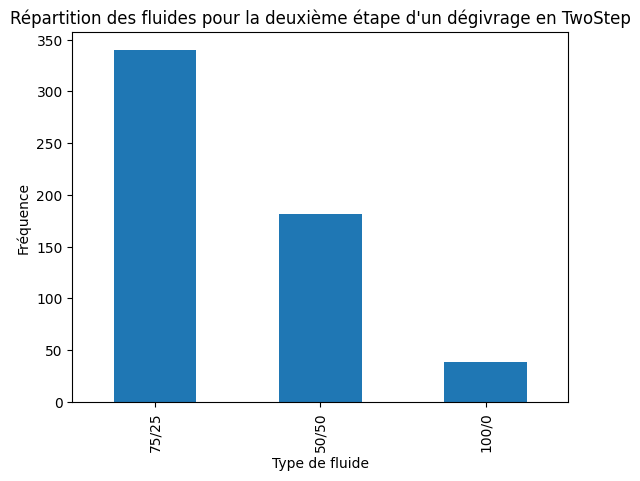

In [12]:
# Analyse univariée - "TwoStep II Fluid"
two_step_ii_counts = df["TwoStep II Fluid"].value_counts()
print("Répartition des fluides pour la deuxième étape d'un dégivrage en TwoStep :")
print(two_step_ii_counts)
two_step_ii_counts.plot(kind='bar')
plt.title("Répartition des fluides pour la deuxième étape d'un dégivrage en TwoStep")
plt.xlabel("Type de fluide")
plt.ylabel("Fréquence")
plt.show()

Dans 'TwoStep II Fluid', les principales proportions sont "75/25" avec 340 occurrences, "50/50" avec 182 occurrences, et "100/0" avec 39 occurrences. Ces valeurs représentent les types et/ou proportions de fluide utilisés pour la deuxième étape du processus de dégivrage.

# **Remplaçons paŸ.90 par 10/90**

In [13]:
import pandas as pd

# Supposons que df soit votre DataFrame contenant les données
# Assurez-vous d'avoir déjà chargé et nettoyé vos données, y compris la correction de "paŸ.90"


# Remplacez "paŸ.90" par "10/90" dans la colonne 'TwoStep I Fluid'
df['TwoStep I Fluid'] = df['TwoStep I Fluid'].replace('paŸ.90', '10/90')

# Remplacez "paŸ.90" par "10/90" dans la colonne 'OneStep Fluid'
df['OneStep Fluid'] = df['OneStep Fluid'].replace('paŸ.90', '10/90')


# **Création de colonnes binaires**

In [14]:
def is_proportion(proportion, target):
    if proportion == target:
        return 1
    else:
        return 0

# Créer une colonne pour chaque proportion cible dans 'OneStep Fluid'
df['Is 50/50 OneStep'] = df['OneStep Fluid'].apply(is_proportion, args=('50/50',))
df['Is 75/25 OneStep'] = df['OneStep Fluid'].apply(is_proportion, args=('75/25',))
df['Is 10/90 OneStep'] = df['OneStep Fluid'].apply(is_proportion, args=('10/90',))

# Afficher les premières lignes pour vérification
print(df[['OneStep Fluid', 'Is 50/50 OneStep', 'Is 75/25 OneStep']].head())

  OneStep Fluid  Is 50/50 OneStep  Is 75/25 OneStep
0         75/25                 0                 1
1         75/25                 0                 1
2         75/25                 0                 1
3         75/25                 0                 1
4         75/25                 0                 1
